<a href="https://colab.research.google.com/github/selvataas/ist-DS-Bootcamp/blob/main/Amazon_Fine_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

csv_path = '/content/drive/MyDrive/Colab Notebooks/archive/Reviews.csv'
df = pd.read_csv(csv_path)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


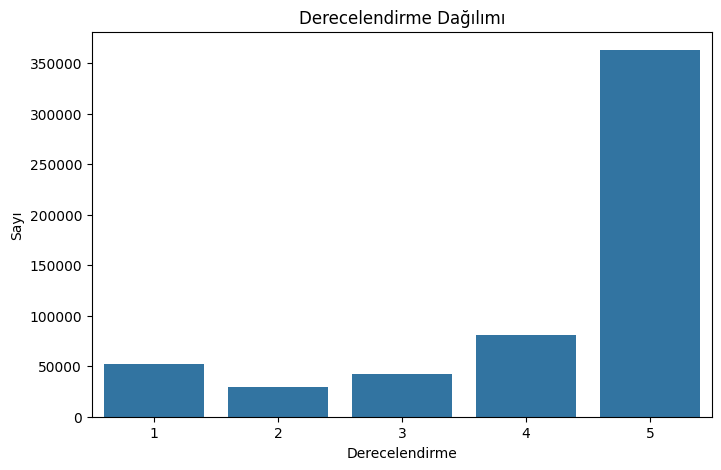

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=df)
plt.title('Derecelendirme Dağılımı')
plt.xlabel('Derecelendirme')
plt.ylabel('Sayı')
plt.show()

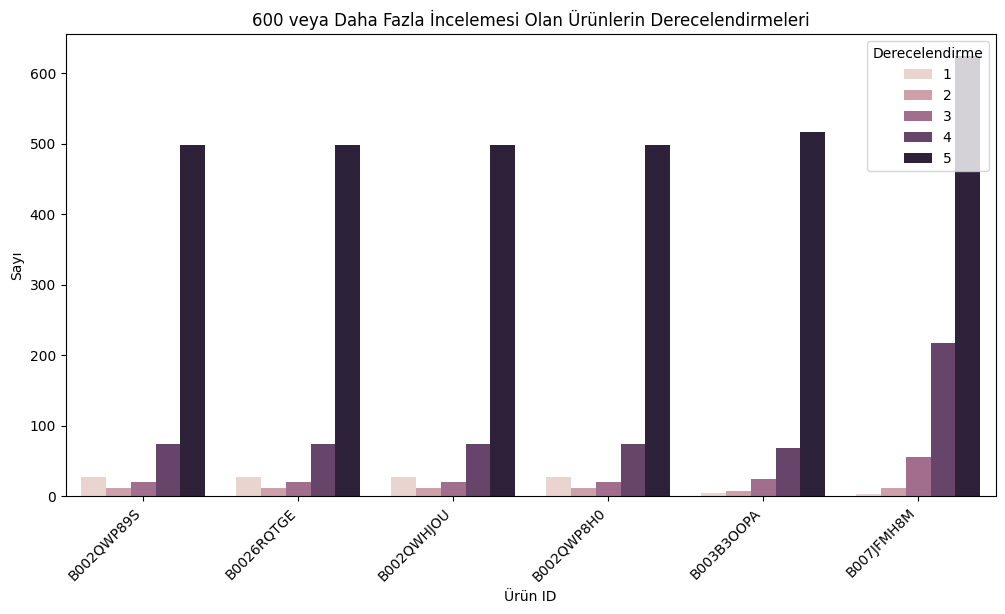

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 600 veya daha fazla incelemesi olan ürünleri seç
popular_products = df['ProductId'].value_counts()[df['ProductId'].value_counts() >= 600].index
filtered_df = df[df['ProductId'].isin(popular_products)]

# Ürün ve derecelendirmelerin sayım grafiği
plt.figure(figsize=(12, 6))
sns.countplot(x='ProductId', hue='Score', data=filtered_df)
plt.title('600 veya Daha Fazla İncelemesi Olan Ürünlerin Derecelendirmeleri')
plt.xlabel('Ürün ID')
plt.ylabel('Sayı')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Derecelendirme')
plt.show()

In [7]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162664 sha256=ba00cc94c42c277bb76dda5b63ec335ca01f4e02af8c249765b9daf714e4e788
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import accuracy
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import RandomizedSearchCV
from collections import defaultdict

from google.colab import files

In [9]:
columns_to_drop = ['Id', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary', 'Text']
df = df.drop(columns=columns_to_drop)
df.head()

,ProductId,UserId,Score
0,B001E4KFG0,A3SGXH7AUHU8GW,5
1,B00813GRG4,A1D87F6ZCVE5NK,1
2,B000LQOCH0,ABXLMWJIXXAIN,4
3,B000UA0QIQ,A395BORC6FGVXV,2
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5


In [10]:
first_column = df.pop('UserId')
df.insert(0, 'UserId', first_column)
df.head()

,UserId,ProductId,Score
0,A3SGXH7AUHU8GW,B001E4KFG0,5
1,A1D87F6ZCVE5NK,B00813GRG4,1
2,ABXLMWJIXXAIN,B000LQOCH0,4
3,A395BORC6FGVXV,B000UA0QIQ,2
4,A1UQRSCLF8GW1T,B006K2ZZ7K,5


In [11]:
user_ratings_count = df.groupby('UserId')['Score'].count()

user_list_min50_ratings = user_ratings_count[user_ratings_count >= 50].index
df_filtered = df[df['UserId'].isin(user_list_min50_ratings)]

In [12]:
print(df_filtered.shape)

(22941, 3)


In [13]:
reader = Reader()
surprise_data = Dataset.load_from_df(df_filtered, reader)
trainset, testset = train_test_split(surprise_data, test_size=.3, random_state=42)

In [14]:
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

class collab_filtering_based_recommender_model():
    def __init__(self, model, trainset, testset, data):
        self.model = model
        self.trainset = trainset
        self.testset = testset
        self.data = data
        self.pred_test = None
        self.recommendations = None
        self.top_n = None
        self.recommenddf = None

    def fit_and_predict(self):
        printmd('**Fitting the train data**',)
        self.model.fit(self.trainset)


        self.pred_test = self.model.test(self.testset)
        rmse = round(accuracy.rmse(self.pred_test), 3)

        mse = round(accuracy.mse(self.pred_test), 3)


        self.top_n = get_top_n(self.pred_test)
        self.recommenddf = pd.DataFrame(columns=['UserId','ProductId','Score'])
        for item in self.top_n:
            subdf = pd.DataFrame(self.top_n[item], columns=['ProductId','Score'])
            subdf['UserId'] = item
            cols = subdf.columns.tolist()
            cols = cols[-1:] + cols[:-1]
            subdf = subdf[cols]
            self.recommenddf = pd.concat([self.recommenddf, subdf], axis = 0)
        return rmse

    def cross_validate(self):
        printmd('**Cross Validating the data**')
        cv_result = cross_validate(self.model, self.data, n_jobs=-1,measures=['RMSE','MAE'], cv=5, verbose=True)
        cv_result = round(cv_result['test_rmse'].mean(),3)
        printmd('**Mean CV rmse is ' + str(cv_result)  + '**')
        return cv_result

    def recommend(self, user_id, n=5):
        printmd('**Recommending top ' + str(n)+ ' products for userid : ' + user_id + '**')

        df = self.recommenddf[self.recommenddf['UserId'] == user_id].head(n)
        display(df)
        return df

In [15]:
def find_best_model(model, parameters,data):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, measures=['rmse','mse'])
    clf.fit(data)
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf

params= {
    "n_epochs": [5, 10, 15, 20],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
clf = find_best_model(SVD, params, surprise_data)

{'rmse': 0.9588602121468339, 'mse': 0.9195272267267134}
{'rmse': {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}, 'mse': {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}}
{'rmse': <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fe19012c970>, 'mse': <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fe19012cd60>}


In [16]:
svd = clf.best_estimator['rmse']
col_fil_svd = collab_filtering_based_recommender_model(svd, trainset, testset, surprise_data)

In [17]:
svd.fit(trainset)

In [18]:
predictions = svd.test(testset)

In [19]:
accuracy.rmse(predictions)
accuracy.mse(predictions)

RMSE: 0.9721
MSE: 0.9450


0.9449649621467637

In [20]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import SVD

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_filtered[['UserId', 'ProductId', 'Score']], reader)
svd = SVD()
cv_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9310  0.9543  0.9286  0.9488  0.9439  0.9413  0.0100  
MAE (testset)     0.6771  0.6939  0.6764  0.6952  0.6870  0.6859  0.0080  
Fit time          1.04    0.83    1.05    1.00    0.50    0.88    0.21    
Test time         0.06    0.23    0.07    0.09    0.03    0.10    0.07    


In [21]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df_filtered[['UserId', 'ProductId', 'Score']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

svd = SVD()
svd.fit(trainset)

user_ids = df_filtered['UserId'].unique()

for user_id in user_ids:
    items_not_rated_by_user = set(trainset.all_items()) - set([trainset.to_inner_iid(iid) for iid in trainset.ur[user_id]])
    anti_testset = [(user_id, trainset.to_raw_iid(item_id), 4) for item_id in items_not_rated_by_user]

    recommendations = svd.test(anti_testset)

    user_recommendations = [(iid, est) for uid, iid, _, est, _ in recommendations]
    user_recommendations.sort(key=lambda x: x[1], reverse=True)

    top_5_recommendations = user_recommendations[:5]
    print(f"User {user_id} için En İyi 5 Öneri: {top_5_recommendations}")

User A2MUGFV2TDQ47K için En İyi 5 Öneri: [('B000EMK4FA', 4.64439230458912), ('B000N30EC8', 4.615822405852988), ('B0015DMKFE', 4.5936193818485025), ('B001EO5YIE', 4.588861498066112), ('B00117O2M8', 4.588382754207236)]
User A2G7B7FKP2O2PU için En İyi 5 Öneri: [('B007JBO41E', 5), ('B0027Z8VES', 5), ('B000MXHR1K', 5), ('B001LNTY70', 5), ('B000H0ZJIG', 5)]
User AQLL2R1PPR46X için En İyi 5 Öneri: [('B001E5DRBO', 5), ('B001E5E1WS', 5), ('B0062A87HA', 5), ('B008J1HO4C', 5), ('B0018CLZBW', 5)]
User AY12DBB0U420B için En İyi 5 Öneri: [('B0002VXZ40', 5), ('B000YSTIL0', 5), ('B002YHLNY4', 5), ('B001AHJ2FQ', 5), ('B003FDC2I2', 5)]
User A2YIO225BTKVPU için En İyi 5 Öneri: [('B004IJHY4Y', 5), ('B001EO5U3I', 5), ('B000H7LVKY', 4.939907354316691), ('B000HDK0DC', 4.879426540536086), ('B008J1HO4C', 4.862946298950104)]
User A1Z54EM24Y40LL için En İyi 5 Öneri: [('B000HZEK1I', 5), ('B00196QTK4', 5), ('B0018KLPFK', 5), ('B001EO5U3I', 5), ('B0018SPTMW', 5)]
User A1IU7S4HCK1XK0 için En İyi 5 Öneri: [('B007JBO4

In [22]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df_filtered[['UserId', 'ProductId', 'Score']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

svd = SVD()
svd.fit(trainset)

user_ids = ['AQLL2R1PPR46X', 'A2GEZJHBV92EVR', 'A1IU7S4HCK1XK0']

for user_id in user_ids:
    items_not_rated_by_user = set(trainset.all_items()) - set([trainset.to_inner_iid(iid) for iid in trainset.ur[user_id]])
    anti_testset = [(user_id, trainset.to_raw_iid(item_id), 4) for item_id in items_not_rated_by_user]

    recommendations = svd.test(anti_testset)

    user_recommendations = [(iid, est) for uid, iid, _, est, _ in recommendations]
    user_recommendations.sort(key=lambda x: x[1], reverse=True)

    top_5_recommendations = user_recommendations[:5]
    print(f"\nUser {user_id} için En İyi 5 Öneri: {top_5_recommendations}")


User AQLL2R1PPR46X için En İyi 5 Öneri: [('B004JGQ15E', 5), ('B000H7LVKY', 5), ('B003BGRUPI', 5), ('B000HDK0D2', 5), ('B002W9C9EM', 5)]

User A2GEZJHBV92EVR için En İyi 5 Öneri: [('B004JGQ15E', 5), ('B001EO5Q64', 5), ('B0028P8H82', 5), ('B000VVT9IM', 5), ('B003BGRUPI', 5)]

User A1IU7S4HCK1XK0 için En İyi 5 Öneri: [('B000EVQ0NQ', 5), ('B000BRR8VQ', 5), ('B001EPQMFM', 5), ('B000NMCOYK', 5), ('B000CRHQN0', 5)]


In [23]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split


reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df_filtered[['UserId', 'ProductId', 'Score']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

knn_model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
knn_model.fit(trainset)

user_id = 'AQLL2R1PPR46X'
user_ratings = df_filtered[df_filtered['UserId'] == user_id][['ProductId', 'Score']]

unrated_items = list(set(df_filtered['ProductId'].unique()) - set(user_ratings['ProductId'].unique()))

predictions = [(user_id, item_id, knn_model.predict(user_id, item_id).est) for item_id in unrated_items]

recommendations_df = pd.DataFrame(predictions, columns=['UserId', 'ProductId', 'Estimated_Rating'])

recommendations_df.sort_values(by='Estimated_Rating', ascending=False, inplace=True)

top_5_recommendations = recommendations_df.head(5)
print(top_5_recommendations)

Computing the cosine similarity matrix...
Done computing similarity matrix.
             UserId   ProductId  Estimated_Rating
5592  AQLL2R1PPR46X  B000E1DR2S               5.0
7496  AQLL2R1PPR46X  B0048IJ5LU               5.0
2385  AQLL2R1PPR46X  B001EO5X6M               5.0
2386  AQLL2R1PPR46X  B0002YB3XC               5.0
4567  AQLL2R1PPR46X  B003NCECVU               5.0


In [24]:
popularity_recommendations = df_filtered.groupby('ProductId')['Score'].mean().reset_index()
popularity_recommendations.columns = ['ProductId', 'Average_Rating']

popularity_recommendations.sort_values(by='Average_Rating', ascending=False, inplace=True)

top_5_popular_items = popularity_recommendations.head(5)
print(top_5_popular_items)

       ProductId  Average_Rating
0     7310172001             5.0
4318  B0014P72A6             5.0
4315  B0014H18J0             5.0
8171  B003ESRF5I             5.0
8173  B003FA0M1O             5.0
